<a href="https://colab.research.google.com/github/ucheokechukwu/courses/blob/main/RL_Generic/reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/hands-on-deep-q-learning-9073040ce841

In [ ]:
from rich import print, inspect, pretty
pretty.install()
!pip install gymnasium -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 12.9 MB/s eta 0:00:00


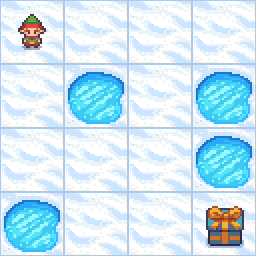

In [ ]:
import gymnasium as gym
from PIL import Image
env = gym.make("FrozenLake-v1",
               render_mode="rgb_array",
               is_slippery=False)

env.reset()
Image.fromarray(env.render())

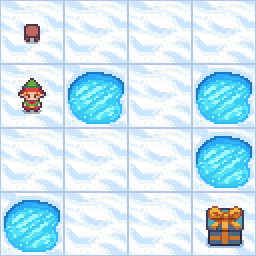

In [ ]:
env.step(1)
Image.fromarray(env.render())

(5, 0.0, True, False, {'prob': 1.0})

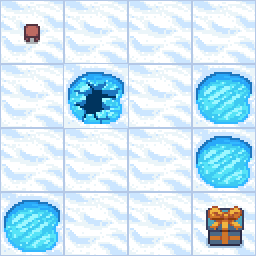

In [ ]:
result = env.step(2)
display(result)
Image.fromarray(env.render())

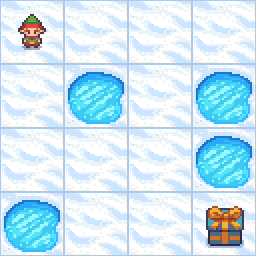

In [ ]:
env.reset()
Image.fromarray(env.render())

(4, 0.0, False, False, {'prob': 1.0})

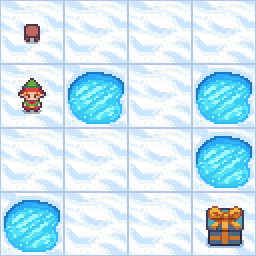

(8, 0.0, False, False, {'prob': 1.0})

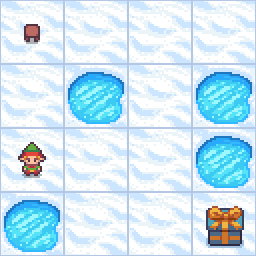

(9, 0.0, False, False, {'prob': 1.0})

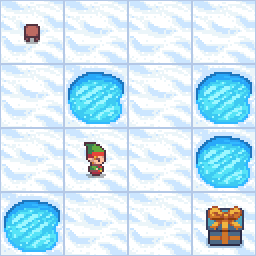

(13, 0.0, False, False, {'prob': 1.0})

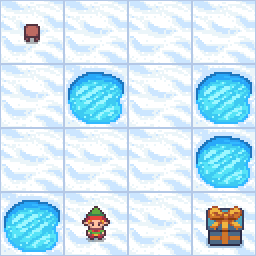

(14, 0.0, False, False, {'prob': 1.0})

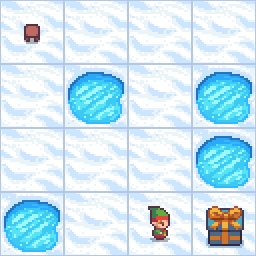

(15, 1.0, True, False, {'prob': 1.0})

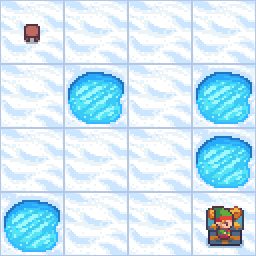

In [ ]:
steps = [1, 1, 2, 1, 2, 2,]
for step in steps:
    res = env.step(step)
    display(res)
    display(Image.fromarray(env.render()))


--2023-12-01 11:29:45--  https://miro.medium.com/v2/resize:fit:964/format:webp/1*t4v28jCP4ABAOUVmFmYvOQ.png
Resolving miro.medium.com (miro.medium.com)... 162.159.153.4, 162.159.152.4, 2606:4700:7::a29f:9904, ...
Connecting to miro.medium.com (miro.medium.com)|162.159.153.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10348 (10K) [image/webp]
Saving to: ‘1*t4v28jCP4ABAOUVmFmYvOQ.png’

1*t4v28jCP4ABAOUVmF 100%[===================>]  10.11K  --.-KB/s    in 0s      

2023-12-01 11:29:45 (83.8 MB/s) - ‘1*t4v28jCP4ABAOUVmFmYvOQ.png’ saved [10348/10348]



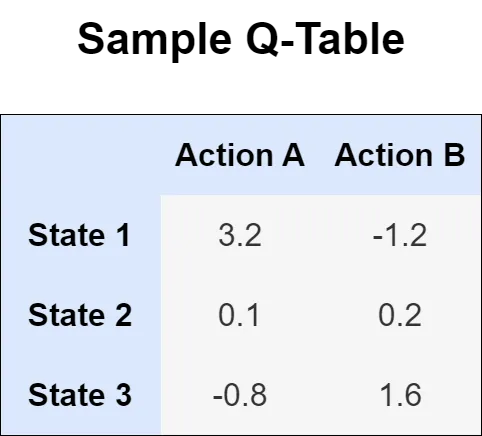

In [ ]:
import IPython
!wget https://miro.medium.com/v2/resize:fit:964/format:webp/1*t4v28jCP4ABAOUVmFmYvOQ.png
IPython.display.Image("1*t4v28jCP4ABAOUVmFmYvOQ.png")

In [ ]:
from itertools import product
import random

from gymnasium.spaces.tuple import Tuple

def space_to_tuples(space):
    if isinstance(space, Tuple):
        for encoding in product(*[range(factor.n) for factor in space]):
            yield encoding
    else:
        for encoding in range(space.n):
            yield encoding
def get_best_action(q_table, state): # for a given state, find the best action for the Q table
    return max (((action, value) for action, value in q_table[state].items()), key=lambda x: x[1])[0]

In [ ]:
import pandas as pd

def train_q_table(env):
    alpha = 0.1
    gamma = 0.9
    n_episodes = 100000
    max_steps = 100
    epsilon = 0.2
    q_table = {
        i: {j: 0 for j in space_to_tuples(env.action_space)} for i in space_to_tuples(env.observation_space)
    }


    display(
        pd.DataFrame.from_dict(q_table))


    # the actual training

    for _ in range(n_episodes):
        # new episode (game), so we need a reset
        state, _ = env.reset()

        # play the game for max_steps
        for step in range(max_steps):
            # pick an action
            if random.random() < epsilon:
                # balance between exploitative and explorative
                action = env.action_space.sample()
            else:
                # exploitative, take the best action as suggested by the q table
                action = get_best_action(q_table, state)

            # taking the action...
            next_state, reward, terminated, _, _ = env.step(action)

            # update the Q-table according to the magic formula
            q_table[state][action] = \
            (1 - alpha) * q_table[state][action] + \
            alpha * (reward + gamma * max(q_table[next_state].values()))

            # check if the game is terminated
            if terminated:
                break
            else:
                # update the current state
                state = next_state
    return q_table

def display_q_table(q_table, movement_key):
    Q_table_df = pd.DataFrame.from_dict(q_table)

    return Q_table_df.idxmax(axis=0).to_frame().replace(movement_key)




In [ ]:
q_table = train_q_table(env)
display_q_table(q_table, movement_key = {0: "Left", 1: "Down", 2: "Right", 3: "Up"})

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,0
0,Down
1,Right
2,Down
3,Left
4,Down
5,Left
6,Down
7,Left
8,Right
9,Down


In [ ]:
# we can use this policy to win th egame now
def render_function(env):
    img = Image.fromarray(env.render())
    display(img)

def play_episode(q_table, env, render=True):
    state, _ = env.reset()
    steps = 0
    while True:
        render_function(env)
        action = get_best_action(q_table, state)
        next_state, reward, terminated, _, _ = env.step(action)
        steps +=1
        if terminated:
            print("Steps:", steps, "\nReward:", reward)
            break
        else:
            state = next_state
    if render:
        display(render_function(env))
    return reward





In [ ]:
# changing the environment

env_taxi = gym.make("Taxi-v3",
                    render_mode="rgb_array")

In [ ]:
taxi_q_table = train_q_table(env_taxi)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movement_key = {
    0: "south",
    1: "north",
    2: "east",
    3: "west",
    4: "pickup" ,
    5: "drop off" }
display_q_table(taxi_q_table, movement_key)

,0
0,south
1,pickup
2,pickup
3,pickup
4,south
...,...
495,south
496,west
497,north
498,west


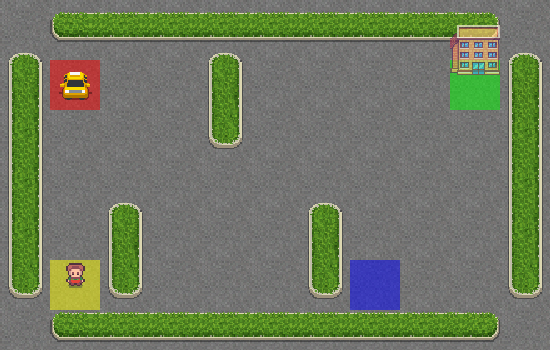

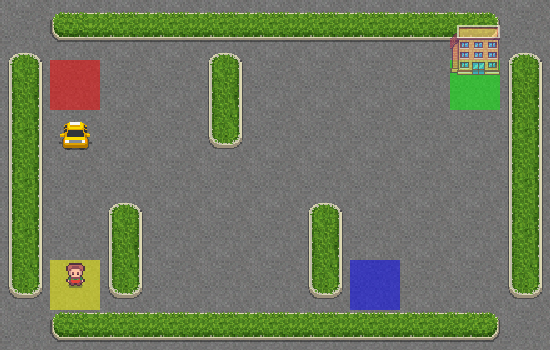

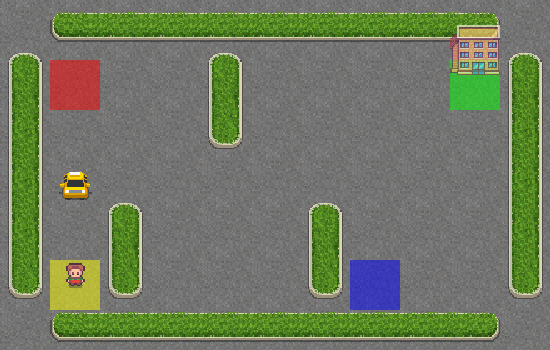

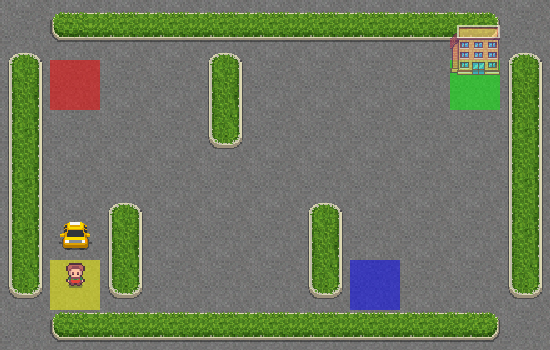

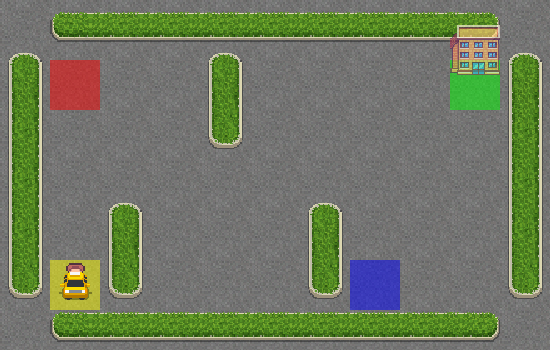

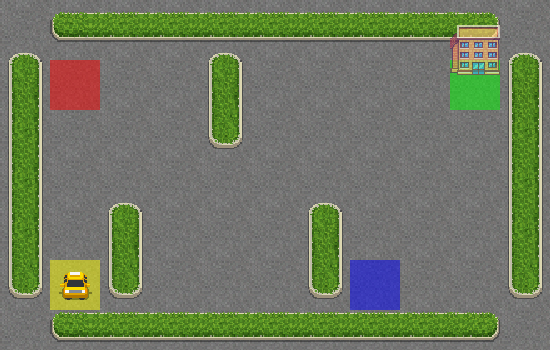

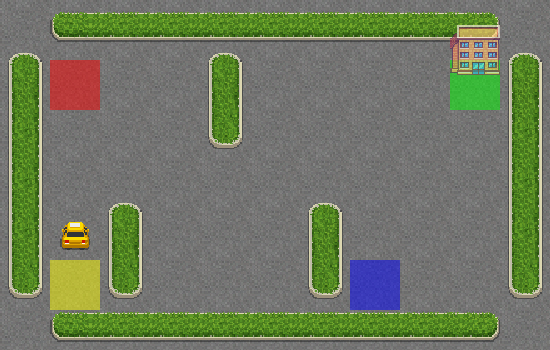

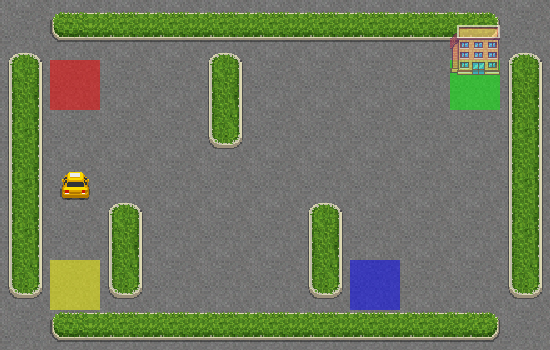

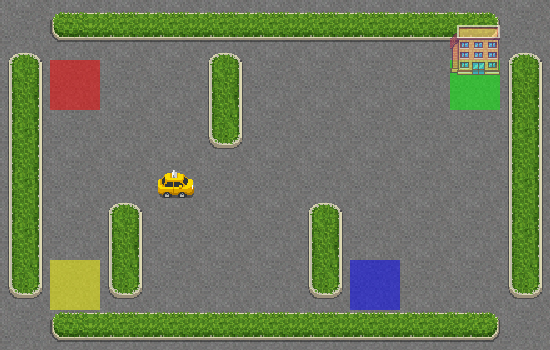

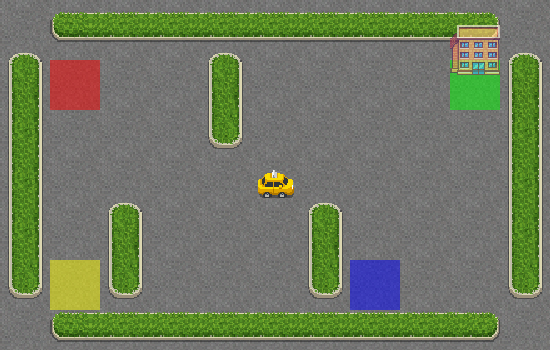

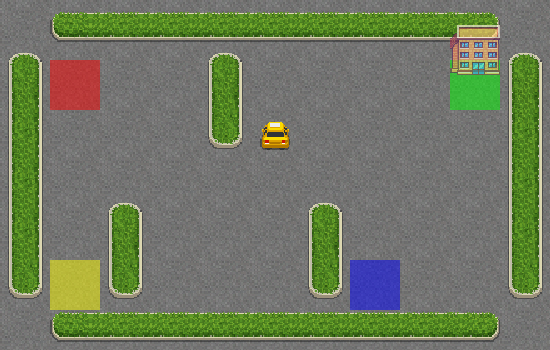

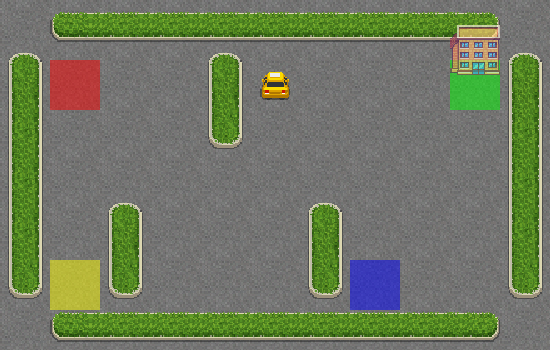

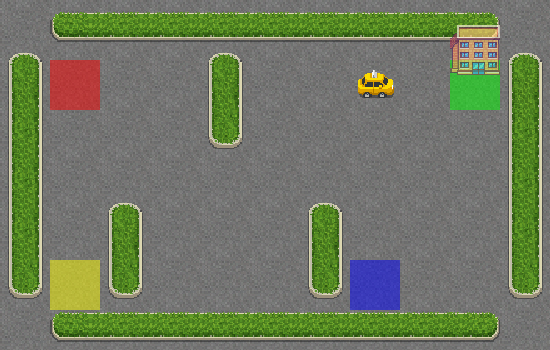

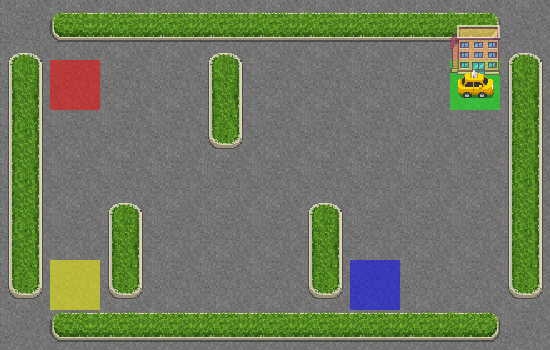

Steps: 14 
Reward: 20

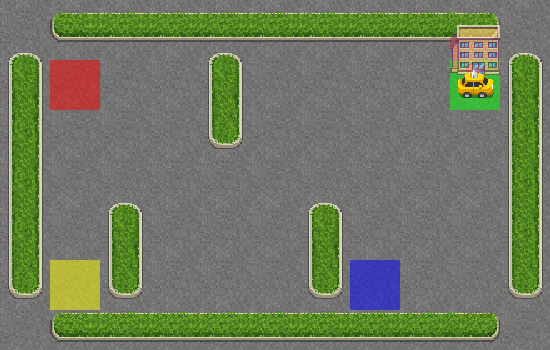

20

In [ ]:
play_episode(taxi_q_table, env_taxi)

In [ ]:
# multi armed bandit
!git clone https://github.com/magni84/gym_bandits.git
import os
os.chdir("gym_bandits")
!pip install -e .

Cloning into 'gym_bandits'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 25 (delta 7), reused 20 (delta 5), pack-reused 0
Receiving objects: 100% (25/25), 5.67 KiB | 5.67 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Obtaining file:///content/gym_bandits
  Preparing metadata (setup.py) ... done
  Running setup.py develop for gym-bandits


In [ ]:
import gym_bandits

In [ ]:
env_bandit = gym.make('MultiarmedBandits-v0')
train_q_table(env_bandit)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0



{
    0: {
        0: 10.374603917470028,
        1: 10.271368655557662,
        2: 12.245606558430818,
        3: 11.239738031364531,
        4: 10.463343827012148,
        5: 11.356966776789095,
        6: 10.848591900664086,
        7: 10.790536933737293,
        8: 11.19742934386079,
        9: 10.088027398883465
    }
}

* https://towardsdatascience.com/hands-on-deep-q-learning-9073040ce841

* https://isl.anthropomatik.kit.edu/pdf/Lin1993.pdf

In [ ]:
import IPython
from rich import print, pretty, inspect
pretty.install()
!pip install gymnasium -q

--2023-12-01 19:02:06--  https://miro.medium.com/v2/resize:fit:720/format:webp/1*Kk8Z1PT87_Ds_UZQlj2Lpw.png
Resolving miro.medium.com (miro.medium.com)... 162.159.152.4, 162.159.153.4, 2606:4700:7::a29f:9904, ...
Connecting to miro.medium.com (miro.medium.com)|162.159.152.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40202 (39K) [image/webp]
Saving to: ‘1*Kk8Z1PT87_Ds_UZQlj2Lpw.png.2’

1*Kk8Z1PT87_Ds_UZQl 100%[===================>]  39.26K  --.-KB/s    in 0.002s  

2023-12-01 19:02:06 (22.3 MB/s) - ‘1*Kk8Z1PT87_Ds_UZQlj2Lpw.png.2’ saved [40202/40202]



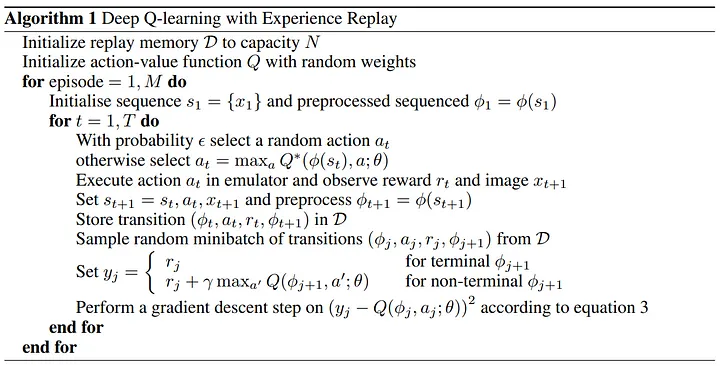

In [ ]:
!wget https://miro.medium.com/v2/resize:fit:720/format:webp/1*Kk8Z1PT87_Ds_UZQlj2Lpw.png
IPython.display.Image("1*Kk8Z1PT87_Ds_UZQlj2Lpw.png")

In [ ]:
import random
from collections import deque, namedtuple

import gymnasium as gym
import numpy as np
import tensorflow as tf
from tqdm.auto import tqdm

n_episodes = 1000
eps = 0.4 # exploration rate
eps_decay = 0.95 # exploration rate decay
min_eps = 0.1
gamma = 0.95 # discount factor
max_memory_size = 10000 # size of replay memory
batch_size = 16
min_length = 160 # minimum length of replay memory before updating gradients
memory_parts = ["state", "action", "next_state", "reward", "done"]

In [ ]:
# replay memory
Memory = namedtuple("Memory", memory_parts)
Memory

<class '__main__.Memory'>

In [ ]:
inspect(Memory, methods=True)

╭─────────────────────────────────────── <class '__main__.Memory'> ───────────────────────────────────────╮
│ class Memory(state, action, next_state, reward, done):                                                  │
│                                                                                                         │
│ Memory(state, action, next_state, reward, done)                                                         │
│                                                                                                         │
│     action = _tuplegetter(1, 'Alias for field number 1')                                                │
│       done = _tuplegetter(4, 'Alias for field number 4')                                                │
│ next_state = _tuplegetter(2, 'Alias for field number 2')                                                │
│     reward = _tuplegetter(3, 'Alias for field number 3')                                                │
│      state = _tuplegetter(0, 'Alias for field number 0')                                                │
│      count = def count(self, value, /): Return number of occurrences of value.                          │
│      index = def index(self, value, start=0, stop=9223372036854775807, /): Return first index of value. │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [ ]:
# replay memory
Memory = namedtuple("Memory", memory_parts)

class ReplayMemory:
    def __init__(self, max_length=None):
        self.max_length = max_length
        self.memory = deque(maxlen=max_length)
    def store(self, data):
        self.memory.append(data)
    def _sample(self, k):
        return random.sample(self.memory, k)

    def structured_sample(self, k):
        batch = self._sample(k)
        result = {}
        for i, part in enumerate(memory_parts):
            result[part] = np.array([row[i] for row in batch])

        return result

    def __len__(self):
        return len(self.memory)

In [ ]:
ReplayMemory()

In [ ]:
inspect(ReplayMemory())

╭────────── <class '__main__.ReplayMemory'> ───────────╮
│ ╭──────────────────────────────────────────────────╮ │
│ │ <__main__.ReplayMemory object at 0x7d85f7bfe9e0> │ │
│ ╰──────────────────────────────────────────────────╯ │
│                                                      │
│ max_length = None                                    │
│     memory = deque()                                 │
╰──────────────────────────────────────────────────────╯

In [ ]:
r = ReplayMemory(max_length=3)

r.store(("a", "b", "c", "e", "f"))
r.store((1, 2, 3, 4, 5))
r.store((6, 7, 8, 9, 0))

In [ ]:
print(r.structured_sample(3))

{
    'state': array(['6', '1', 'a'], dtype='<U21'),
    'action': array(['7', '2', 'b'], dtype='<U21'),
    'next_state': array(['8', '3', 'c'], dtype='<U21'),
    'reward': array(['9', '4', 'e'], dtype='<U21'),
    'done': array(['0', '5', 'f'], dtype='<U21')
}

In [ ]:
r.store(list("zyxwv"))

In [ ]:
print(r.structured_sample(3))

{
    'state': array(['1', '6', 'z'], dtype='<U21'),
    'action': array(['2', '7', 'y'], dtype='<U21'),
    'next_state': array(['3', '8', 'x'], dtype='<U21'),
    'reward': array(['4', '9', 'w'], dtype='<U21'),
    'done': array(['5', '0', 'v'], dtype='<U21')
}

In [ ]:
r.store(list(range(2,7)))
r.structured_sample(3)


{
    'state': array(['6', '2', 'z'], dtype='<U21'),
    'action': array(['7', '3', 'y'], dtype='<U21'),
    'next_state': array(['8', '4', 'x'], dtype='<U21'),
    'reward': array(['9', '5', 'w'], dtype='<U21'),
    'done': array(['0', '6', 'v'], dtype='<U21')
}

In [ ]:
r.memory

deque([(6, 7, 8, 9, 0), ['z', 'y', 'x', 'w', 'v'], [2, 3, 4, 5, 6]])

In [ ]:
r.store(("a", "b", "c", "e", "f"))
r.memory

deque([['z', 'y', 'x', 'w', 'v'], [2, 3, 4, 5, 6], ('a', 'b', 'c', 'e', 'f')])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                80        
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 234 (936.00 Byte)
Trainable params: 234 (936.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


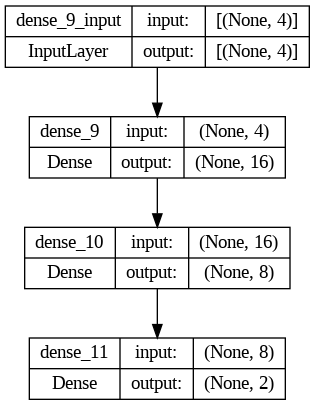

In [ ]:
# the model
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(16, input_shape=(4,), activation='relu'), # state
     tf.keras.layers.Dense(8, activation='relu'),
     tf.keras.layers.Dense(2, activation='softmax'), # 2 actions - go left or ight

    ]
)
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
env = gym.make('CartPole-v1')
inspect(env, methods=True)

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.awehoi234_wdfjwljet234_234wdfoijsdfmmnxpi492 to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.awehoi234_wdfjwljet234_234wdfoijsdfmmnxpi492` for environment variables or `env.get_wrapper_attr('awehoi234_wdfjwljet234_234wdfoijsdfmmnxpi492')` that will search the reminding wrappers.
  logger.warn(


╭─────────────────────────────── <class 'gymnasium.wrappers.time_limit.TimeLimit'> ───────────────────────────────╮
│ This wrapper will issue a `truncated` signal if a maximum number of timesteps is exceeded.                      │
│                                                                                                                 │
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>                                    │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│      action_space = Discrete(2)                                                                                 │
│               env = <OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>                               │
│          metadata = {'render_modes': ['human', 'rgb_array'], 'render_fps': 50}                                  │
│         np_random = Generator(PCG64) at 0x7D85F7B75E00                                                          │
│ observation_space = Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00           │
│                     3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)                                  │
│       render_mode = None                                                                                        │
│      reward_range = (-inf, inf)                                                                                 │
│              spec = EnvSpec(                                                                                    │
│                         id='CartPole-v1',                                                                       │
│                         entry_point='gymnasium.envs.classic_control.cartpole:CartPoleEnv',                      │
│                         reward_threshold=475.0,                                                                 │
│                         nondeterministic=False,                                                                 │
│                         max_episode_steps=500,                                                                  │
│                         order_enforce=True,                                                                     │
│                         autoreset=False,                                                                        │
│                         disable_env_checker=False,                                                              │
│                         apply_api_compatibility=False,                                                          │
│                         kwargs={},                                                                              │
│                         namespace=None,                                                                         │
│                         name='CartPole',                                                                        │
│                         version=1,                                                                              │
│                         additional_wrappers=(),                                                                 │
│                         vector_entry_point='gymnasium.envs.classic_control.cartpole:CartPoleVectorEnv'          │
│                     )                                                                                           │
│         unwrapped = <gymnasium.envs.classic_control.cartpole.CartPoleEnv object at 0x7d85f7c77a30>              │
│        class_name = def class_name() -> 'str': Returns the class name of the wrapper.                           │
│             close = def close(): Closes the wrapper an

In [ ]:
env.action_space.sample()

1

In [ ]:
np.array([ 0.03089856,  0.04060306,  0.03969669, -0.03355408]).shape

(4,)

In [ ]:
model.predict(env.observation_space.sample()[np.newaxis, :])

1/1 [==============================] - 0s 67ms/step


array([[0., 1.]], dtype=float32)

In [ ]:
np.round(np.array([[0.4006144]], dtype=np.float32)).item()

0.0

In [ ]:
model.predict(np.expand_dims(np.array([ 0.03089856,  0.04060306,  0.03969669, -0.03355408]), axis=0)).argmax()

1/1 [==============================] - 0s 32ms/step


0

In [ ]:
batch_size

16

In [ ]:
# training
from rich.progress import track

env = gym.make('CartPole-v1')
replay_memory = ReplayMemory(max_length = max_memory_size)

model_performance = {}

for epoch_num, episode in track(enumerate(range(n_episodes)), total = n_episodes):


    state, _ = env.reset()
    print(f"State:", state)
    done = False
    total_reward = 0
    while not done:
        # if random.random() < eps:
        if False:
            action = env.action_space.sample() # random action
        else:
            x = np.expand_dims(state, axis=0)
            action = model.predict(
                x,
                verbose=False)
            print("action:", action)
            action = action.argmax(axis=1)
            print("action:", action)



        next_state, reward, done, _, _ = env.step(action)
        memory = Memory(state, action, next_state, reward, done)
        replay_memory.store(memory)

        # fiting the model when there's enough memory to call an epoch

        if len(replay_memory) >= min_length:
            batch = replay_memory.structured_sample(batch_size)
            # R(s, a) + γ·maxₐ N(s') if not a terminal state, otherwise R(s, a)
            target_batch = batch['reward'] \
                            + gamma*model.predict(batch['next_state'], verbose=False).max(axis=1) \
                            * (1 - batch["done"]) # if done, then it's just batch['reward]

            # set the target for the action that was done and leave the outputs of other 3 actions as they are
            targets = model.predict(batch['state'], verbose=False)

            targets[range(batch_size), batch['action']] = target_batch

            model.fit(batch['state'], targets, verbose=False, batch_size=batch_size)

        state = next_state
        total_reward += reward


    model_performance[epoch_num] = total_reward
    eps = max(min_eps, eps * eps_decay)




Output()

State: [-0.01302434 -0.03732718  0.02054193 -0.03755537]

action: [[0.5070997  0.49290028]]

action: [0]

AssertionError: ignored

In [ ]:
!wget https://github.com/Garve/towards_data_science/raw/main/Hands-On%20Deep%20Q-Learning/230.zip
from zipfile import ZipFile
with ZipFile('230.zip', 'r') as f:
    f.extractall()

In [ ]:
model = tf.keras.models.load_model("230") # the model is in my Github, https://github.com/Garve/towards_data_science/blob/main/A%20Tutorial%20on%20Deep%20Q-Learning/230.zip
env = gym.make("CartPole-v1", render_mode="human")

state, _ = env.reset()
done = False
total_reward = 0

while not done and total_reward < 500: # force end the game after 500 time steps because the model is too good!
    env.render()
    action = model.predict(state[np.newaxis, :], verbose=False).argmax(axis=1)[0]
    state, reward, done, _, _ = env.step(action)
    total_reward += reward
print(total_reward)
env.close()

In [ ]:
# training

replay_memory = ReplayMemory(max_length = max_memory_size)



for epoch_num, episode in track(enumerate(range(n_episodes)), total = n_episodes):


    state, _ = env.reset()

    done = False
    total_reward = 0
    while not done:
        if random.random() < eps:
            action = env.action_space.sample() # random action
        else:
            x = np.expand_dims(state, axis=0)
            action = model.predict(x,verbose=False)
            action = int(np.round(action).item())

        next_state, reward, done, _, _ = env.step(action)
        memory = Memory(state, action, next_state, reward, done)
        replay_memory.store(memory)

        # fiting the model when there's enough memory to call an epoch
        # and it's in multiplies of batch_size


        if not len(replay_memory)% batch_size:
            print("Fitting the model here...")
            batch = replay_memory.structured_sample(batch_size)

            # R(s, a) + γ·maxₐ N(s') if not a terminal state, otherwise R(s, a)
            target_batch = batch['reward'] \
                            + gamma*model.predict(batch['next_state'], verbose=False).max(axis=1) \
                            * (1 - batch["done"]) # if done, then it's just batch['reward]

            print("Target_batch")
            print(target_batch, target_batch.shape)

            # set the target for the action that was done and leave the outputs of other 3 actions as they are
            targets = model.predict(batch['state'], verbose=False)
            print("Targets")
            print(targets)
            print(targets.shape)

            targets[range(batch_size), batch['action']] = target_batch

            model.fit(batch['state'], targets, verbose=False, batch_size=batch_size)
            break

        state = next_state
        total_reward += reward
        break

    eps = max(min_eps, eps * eps_decay)




Output()

Fitting the model here...

Target_batch

[1.45350614 1.45366466 1.45044208 1.51264369 1.50955075 1.4536787
 1.45009872 1.51567513 1.4513236  1.50985897 1.44939888 1.45006999
 1.51320785 1.44916508 1.44725516 1.45355484]
(16,)

Targets

[[0.49922326]
 [0.49979436]
 [0.49852812]
 [0.5035962 ]
 [0.5006781 ]
 [0.4989065 ]
 [0.4984495 ]
 [0.5058069 ]
 [0.4987359 ]
 [0.49918833]
 [0.49498034]
 [0.49629772]
 [0.50355905]
 [0.49580976]
 [0.49161786]
 [0.49870336]]

(16, 1)

IndexError: ignored

In [ ]:
targets[range(batch_size), :]


array([[0.49922326],
       [0.49979436],
       [0.49852812],
       [0.5035962 ],
       [0.5006781 ],
       [0.4989065 ],
       [0.4984495 ],
       [0.5058069 ],
       [0.4987359 ],
       [0.49918833],
       [0.49498034],
       [0.49629772],
       [0.50355905],
       [0.49580976],
       [0.49161786],
       [0.49870336]], dtype=float32)